In [7]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Загрузка и анализ набора данных
raw_dataset = pandas.read_csv('machine.data.csv', header=None) # Убедиться в правильности пути к файлу!
raw_dataset.head(10) # Вывод первых 10 строк

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [9]:
# Размер набора данных
print(raw_dataset.shape)

(209, 10)


In [10]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pandas.DataFrame()

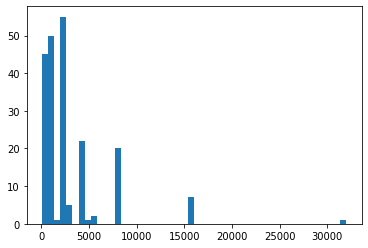

In [11]:
# Обработка данных в столбце №3 (MMIN: minimum main memory in kilobytes (integer))

# Загружаем данные
data = raw_dataset[3]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

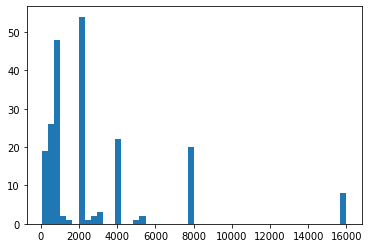

In [12]:
# Наблюдаем проблему №4 - выброс в районе 32000. Применяем отсечение с разрешенным интервалом от 0 до 16000.
data = numpy.clip(data, 0, 16000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

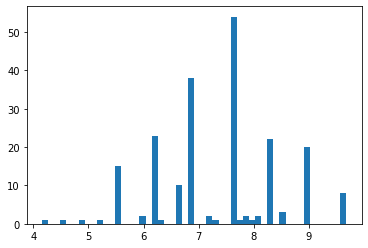

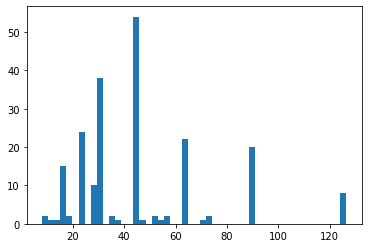

In [13]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [14]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [15]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

4.1588830833596715
9.680344001221918


In [16]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

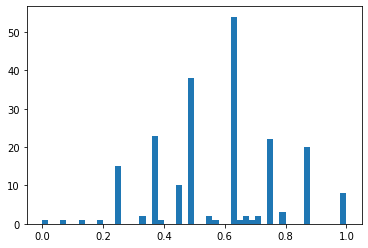

In [17]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

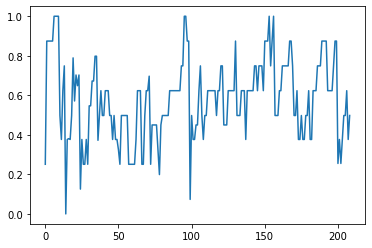

In [18]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [19]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [20]:
# Конвертируем в одномерный массив
data = data.flatten()

In [21]:
# Сохраняем в итоговом наборе данных
dataset['MMIN'] = data

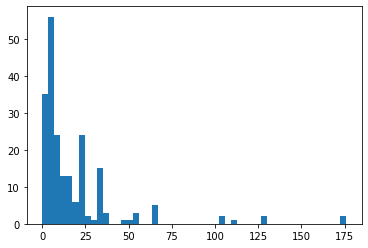

In [22]:
# Обработка данных в столбце №7 (CHMAX: maximum channels in units (integer))

# Загружаем данные
data = raw_dataset[7]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

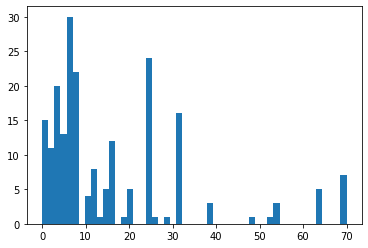

In [23]:
# Наблюдаем проблему №4 - выбросы значений в интервале (100, 175). Применяем отсечение с разрешенным интервалом от 0 до 70.
data = numpy.clip(data, 0, 70)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

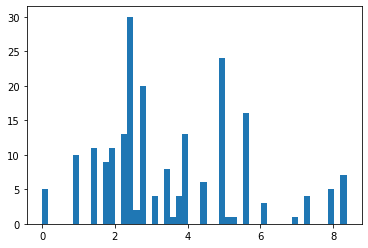

In [24]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Применять логарифм нельзя, т.к. среди значений есть нули.
# Применим извлечение квадратного корня.

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [25]:
data = data ** 0.5

In [26]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

0.0
8.366600265340756


In [27]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

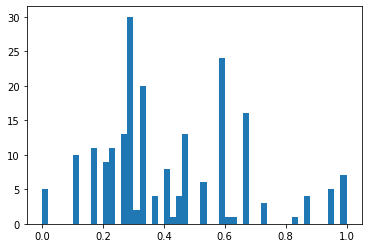

In [28]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

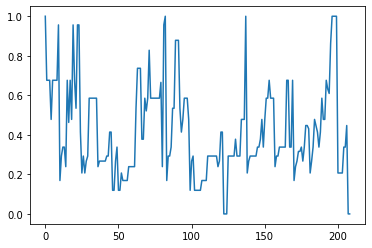

In [29]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [30]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [31]:
# Конвертируем в одномерный массив
data = data.flatten()

In [32]:
# Сохраняем в итоговом наборе данных
dataset['CHMAX'] = data

In [33]:
print(dataset)

         MMIN     CHMAX
0    0.251074  1.000000
1    0.874463  0.676123
2    0.874463  0.676123
3    0.874463  0.676123
4    0.874463  0.478091
..        ...       ...
204  0.497852  0.338062
205  0.497852  0.338062
206  0.623389  0.447214
207  0.376611  0.000000
208  0.497852  0.000000

[209 rows x 2 columns]


In [136]:
DF=pandas.read_csv('machine.data.csv', header=None)
DF=DF.drop(1, axis=1)
DF=DF.drop(9, axis=1)
DF
DF.to_csv('prepared_data.csv')